# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Sklearn
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, silhouette_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Visualization
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Load the Pokemon dataset

### 1.1 load dataset

In [2]:
train_data = pd.read_csv("dataset/Pokemon_train.csv")
test_data = pd.read_csv("dataset/Pokemon_test.csv")

In [3]:
train_data.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,50.000000,6.000000e+05,0.700000,45.000000,88.100000,347.000000,40.000000,50.000000,75.000000,rock
1,0.990403,1.0,0.990403,1.000000,0.990403,2.038386,0.509597,0.495202,1.0,1.980807,...,130.287898,1.058711e+06,1.694242,84.520170,50.000000,525.040340,60.287898,81.343524,25.287898,rock
2,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,1.0,2.000000,...,50.000000,1.059860e+06,0.400000,50.000000,88.100000,258.000000,50.000000,50.000000,40.000000,water
3,0.500000,1.0,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.0,0.500000,...,61.282340,1.000000e+06,1.028234,66.831914,85.773470,196.636341,100.495741,107.252130,68.297445,fire
4,0.334368,0.5,0.000000,1.662527,1.000000,0.334368,1.000000,1.000000,1.0,0.668737,...,87.575591,8.000000e+05,1.432505,88.374731,66.670456,322.211607,111.563172,106.563172,73.250537,fairy


### Copy Dataset

In [4]:
train_df = train_data
test_df = test_data

In [5]:
train_df.shape

(1251, 33)

### Describe Data

In [6]:
#train_df.info()

In [7]:
#train_df.describe()

### Checking Null Values and their numbers in each column

In [8]:
# check null in train
train_df.isnull().sum().sum()

0

In [9]:
# check null in train
test_df.isnull().sum().sum()

0

### Label Encoding of classes

In [10]:
type_labels = LabelEncoder()
train_df['type1'] = type_labels.fit_transform(train_df['type1'])
test_df['type1'] = type_labels.fit_transform(test_df['type1'])
train_df.type1.unique()

array([14, 16,  6,  4,  8, 12,  0,  5,  2,  3, 15,  7,  9,  1, 11, 10, 13])

### Scale data
  
   - **Scale Train**

In [11]:
# # # scale train
# sc = StandardScaler()
# train_df["attack"] = sc.fit_transform(train_df["attack"].values.reshape(-1,1))
# train_df["base_egg_steps"] = sc.fit_transform(train_df["base_egg_steps"].values.reshape(-1,1))
# train_df["base_happiness"] = sc.fit_transform(train_df["base_happiness"].values.reshape(-1,1))
# train_df["base_total"] = sc.fit_transform(train_df["base_total"].values.reshape(-1,1))
# train_df["capture_rate"] = sc.fit_transform(train_df["capture_rate"].values.reshape(-1,1))
# train_df["defense"] = sc.fit_transform(train_df["defense"].values.reshape(-1,1))
# train_df["hp"] = sc.fit_transform(train_df["hp"].values.reshape(-1,1))
# train_df["percentage_male"] = sc.fit_transform(train_df["percentage_male"].values.reshape(-1,1))
# train_df["pokedex_number"] = sc.fit_transform(train_df["pokedex_number"].values.reshape(-1,1))
# train_df["sp_attack"] = sc.fit_transform(train_df["sp_attack"].values.reshape(-1,1))
# train_df["sp_defense"] = sc.fit_transform(train_df["sp_defense"].values.reshape(-1,1))
# train_df["speed"] = sc.fit_transform(train_df["speed"].values.reshape(-1,1))

 - **Scale Test**

In [12]:
# # scale test
# test_df["attack"] = sc.fit_transform(test_df["attack"].values.reshape(-1,1))
# test_df["base_egg_steps"] = sc.fit_transform(test_df["base_egg_steps"].values.reshape(-1,1))
# test_df["base_happiness"] = sc.fit_transform(test_df["base_happiness"].values.reshape(-1,1))
# test_df["base_total"] = sc.fit_transform(test_df["base_total"].values.reshape(-1,1))
# test_df["capture_rate"] = sc.fit_transform(test_df["capture_rate"].values.reshape(-1,1))
# test_df["defense"] = sc.fit_transform(test_df["defense"].values.reshape(-1,1))
# test_df["hp"] = sc.fit_transform(test_df["hp"].values.reshape(-1,1))
# test_df["percentage_male"] = sc.fit_transform(test_df["percentage_male"].values.reshape(-1,1))
# test_df["pokedex_number"] = sc.fit_transform(test_df["pokedex_number"].values.reshape(-1,1))
# test_df["sp_attack"] = sc.fit_transform(test_df["sp_attack"].values.reshape(-1,1))
# test_df["sp_defense"] = sc.fit_transform(test_df["sp_defense"].values.reshape(-1,1))
# test_df["speed"] = sc.fit_transform(test_df["speed"].values.reshape(-1,1))

### After encoding and scaling our data we are going to see our correlation map

<AxesSubplot:>

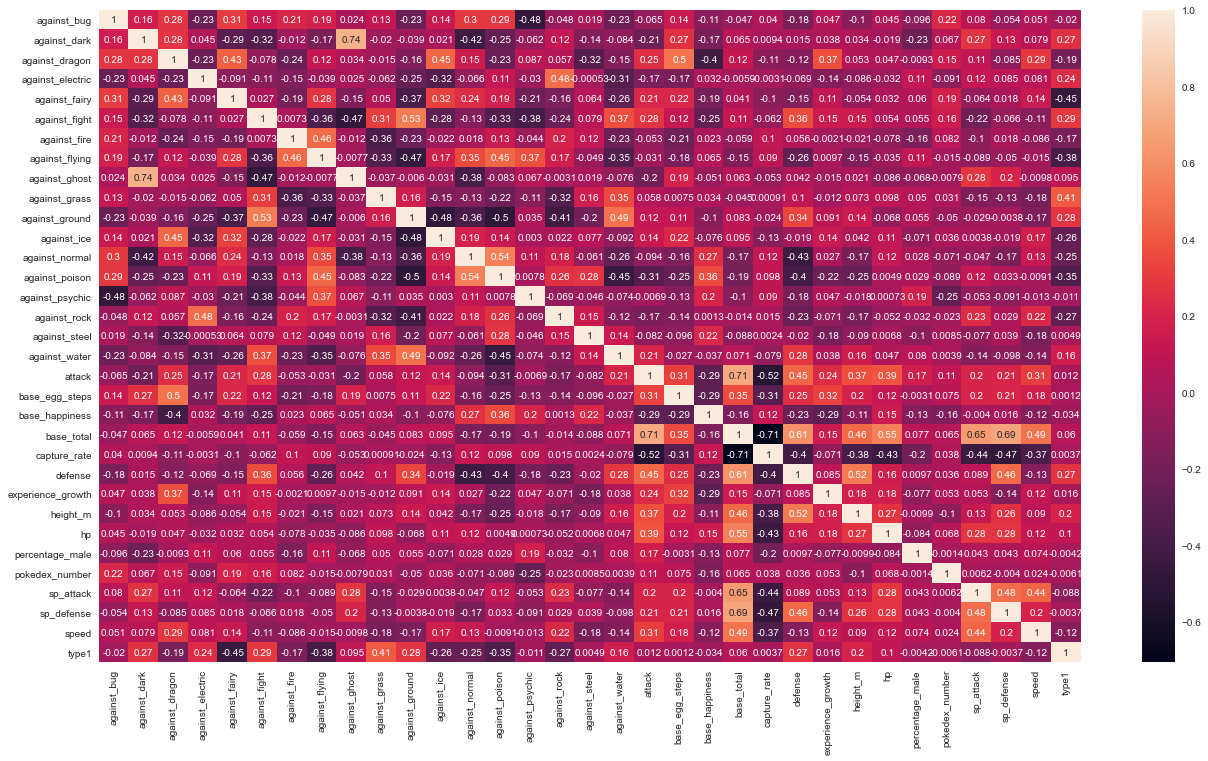

In [13]:
plt.figure(figsize=(22,12))
sns.heatmap(train_df.corr(), annot=True)

### 1.2 Split Data to X_train and y_train

In [14]:
X_train = train_df.iloc[: , 0:32]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[: , 0:32]
y_test = test_df.iloc[:, -1]

# 2. Apply GNB classifier and SVM 

### 2.2 Provide the accuracy of GNB and SVM 

In [15]:
def print_accuracy(model, y_test, y_pred, X_test):
    print('\nClassification Report:\n')
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------\n")

    acc = accuracy_score(y_test, y_pred) 
    print("Accuracy: {:.2f}\n".format(acc))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    print('\nConfusion Matrix:')
    plot_confusion_matrix(model, X_test, y_test,
                          xticks_rotation='horizontal',
                          ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.show()
    
    return acc  

### 2.1.1 SVM

In [16]:
svm_model = SVC(kernel='rbf')
svm_model = svm_model.fit(X_train, y_train) 
y_pred_svm = svm_model.predict(X_test)


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.29      0.94      0.44        16
           3       0.06      0.88      0.12        16
           4       0.22      1.00      0.36         9
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        18

 

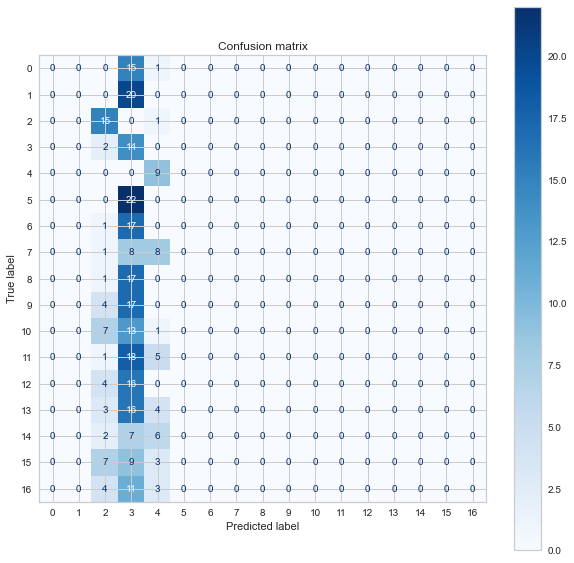

In [17]:
# accuracy SVM
svm_acc = print_accuracy(svm_model, y_test, y_pred_svm, X_test) 

### 2.1.2 GNB

In [18]:
gb_model = GaussianNB()
gb_model = gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


Classification Report:

              precision    recall  f1-score   support

           0       0.18      0.44      0.26        16
           1       1.00      0.60      0.75        20
           2       0.56      0.94      0.70        16
           3       0.23      0.44      0.30        16
           4       0.56      1.00      0.72         9
           5       0.83      0.86      0.84        22
           6       0.35      0.67      0.46        18
           7       0.57      0.47      0.52        17
           8       0.00      0.00      0.00        18
           9       0.50      0.86      0.63        21
          10       0.50      0.43      0.46        21
          11       0.00      0.00      0.00        24
          12       0.50      0.50      0.50        20
          13       0.71      0.22      0.33        23
          14       0.83      0.67      0.74        15
          15       1.00      1.00      1.00        19
          16       0.50      0.06      0.10        18

 

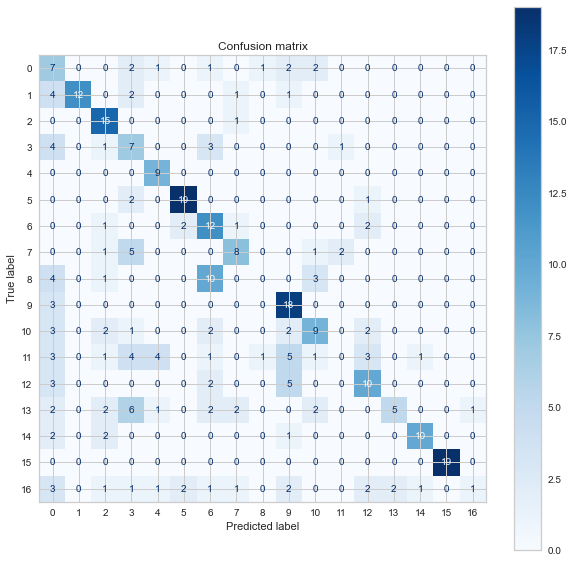

In [19]:
# accuracy of GNB
gnb_acc = print_accuracy(gb_model, y_test, y_pred_gb, X_test)

### 2.3 Apply TSNE

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne_model = TSNE(n_components= 2, random_state=0)
X_train_tsne = tsne_model.fit_transform(X_train)
X_test_tsne = tsne_model.fit_transform(X_test)

target_lbl_train = np.unique(train_df['type1'])
target_lbl_test = np.unique(test_df['type1'])
y_train = train_df.iloc[: , -1]
y_test = test_df.iloc[: , -1]

In [22]:
def plot_scatter(df, target_lbl, X_train, y):
    target_ids = range(len(np.unique(df['type1'])))

    plt.figure(figsize=(12, 10))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple',
              'teal', 'darkred', 'indigo', 'plum', 'pink', 'olive', 'navy'] 

    for i, c, label in zip(target_ids, colors, target_lbl):
        plt.scatter(X_train[y == i, 0], X_train[y == i, 1], c= c, label= label)
    plt.legend()
    plt.show()

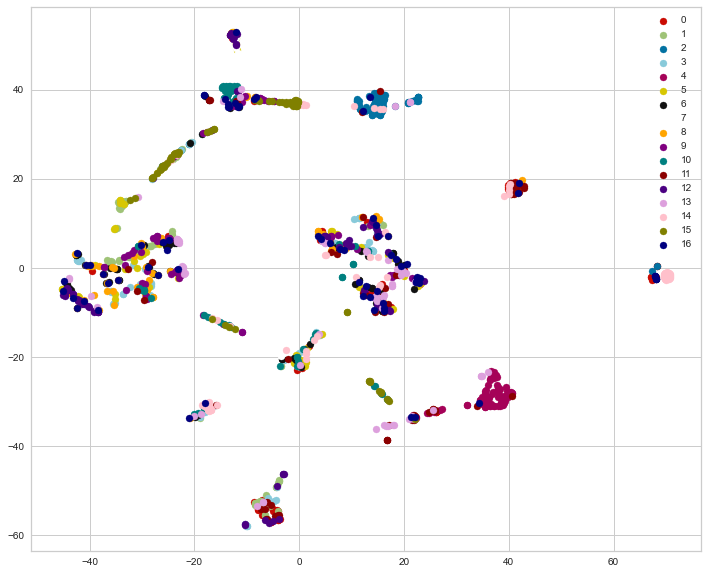

In [23]:
# plot scatter of train
plot_scatter(train_df, target_lbl_train, X_train_tsne, y_train)

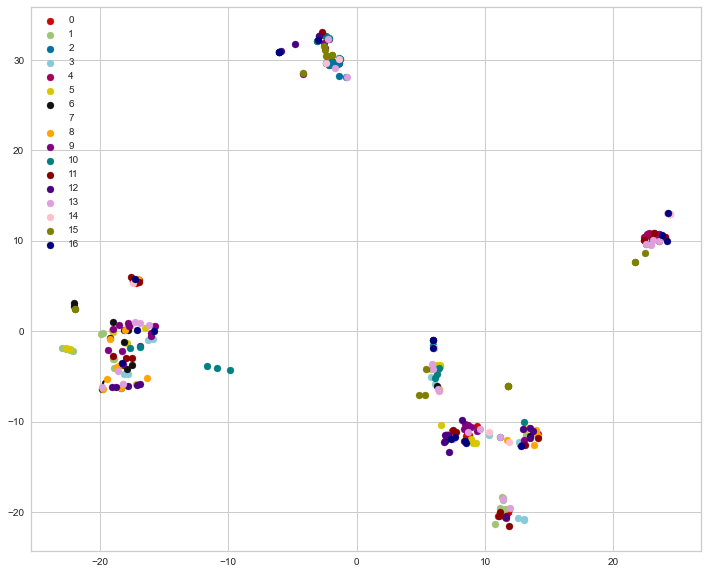

In [24]:
# plot scatter of train
plot_scatter(test_df, target_lbl_test, X_test_tsne, y_test)

### 3.1 plot the distortion score (a.k.a inertia) vs the number of clusters 

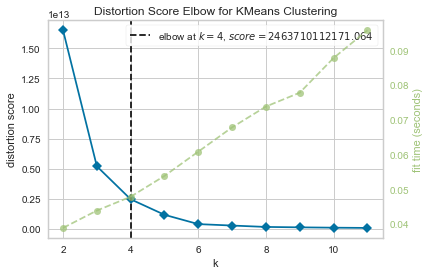

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Instantiate Kmeans model and visualizer
model = KMeans(random_state= 2021)
visualizer = KElbowVisualizer(model,
                              k=(2,12),
                              timings= True)
# Fit the data to the visualizer
visualizer.fit(X_train)  
 # Finalize and render the figure
visualizer.show()       

### 3.2 the elbow point is achieved with 4 clusters which is highlighted by the function itself

### 3.3 Plot clustered data with optimum number of cluster

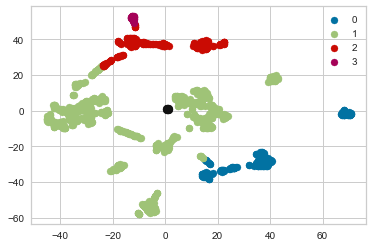

In [26]:
km = KMeans(random_state= 2021, n_clusters = 4).fit(X_train)

# get labels of test
# label = km.predict(X_test)
# u_labels = np.unique(label)

# get labels of train
cluster_labels = km.labels_
clabel = np.unique(cluster_labels)

#Getting the Centroids
centroids = km.cluster_centers_

#plotting the results:
for i in clabel:
    plt.scatter(X_train_tsne[cluster_labels == i , 0],
                X_train_tsne[cluster_labels == i , 1], label = i)
plt.scatter(centroids[:,0], centroids[:,1], s = 80,color = 'k')
plt.legend()
plt.show()

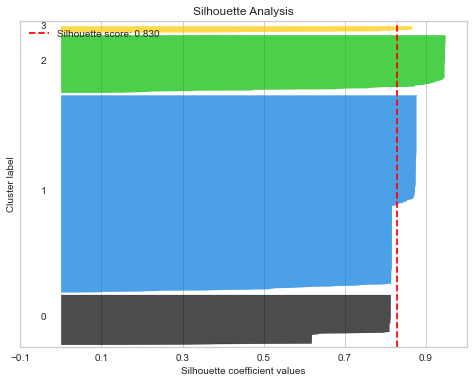

In [27]:
skplt.metrics.plot_silhouette(X_train,
                              cluster_labels,
                              figsize=(8,6));

In [28]:
def plot_accuracy_with_baseline(num_features, acc_list, baseline_acc, title):
   # custom the stem lines
    (markers, stemlines, baseline) = plt.stem(num_features, acc_list, bottom = baseline_acc)
    plt.setp(stemlines, linestyle="-", color="olive", linewidth=0.5 )
    plt.plot(num_features, acc_list)
    
    plt.title(title)
    plt.ylabel('Accuraies')
    plt.xlabel('number of features')
    plt.show()  

### 4.1 Apply PCA method to data

In [29]:
def build_model_pca(X_train, X_test, y_train, y_test, model, baseline_acc, title):
    num_features = [ ] 
    acc_list = [ ] 
    for i in range(2, 30): 
        pca = PCA(n_components= i, svd_solver= 'full', random_state= 2021) 
        pca.fit(X_train, y_train) 
        pca_train = pca.transform(X_train)
        pca_test = pca.transform(X_test) 
        num_features.append(i)  
        model_pca = model.fit(pca_train, y_train) 
        y_pred = model_pca.predict(pca_test) 
        acc = accuracy_score(y_test, y_pred) 
        acc_list.append(round(acc,3))     
    
    max_acc = np.max(acc_list)
    max_index = acc_list.index(max_acc)
    
    print("Accuracies :\n", acc_list)
    print(" ")
    print("# of Features: \n", num_features)
    print(" ")
    print("Max Accuracy: ",max_acc)
    print("Index of Max Accuracy: ", max_index)
    
    # accuracy SVM
    # print_accuracy(model_pca, y_test, y_pred, pca_test)   
    
    plot_accuracy_with_baseline(num_features, acc_list, baseline_acc, title)

#### 4.1.1 PCA SVM 

Accuracies :
 [0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166]
 
# of Features: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
 
Max Accuracy:  0.166
Index of Max Accuracy:  0


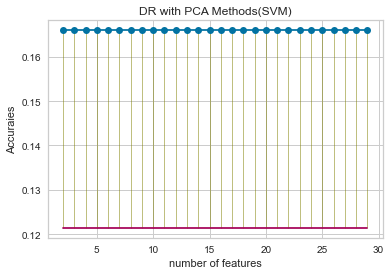

In [30]:
# SVM pca
svm_model = SVC(kernel='rbf')
build_model_pca(X_train, X_test, y_train, y_test, svm_model, svm_acc, 'DR with PCA Methods(SVM)')  

#### 4.1.2 PCA GNB

Accuracies :
 [0.217, 0.272, 0.297, 0.307, 0.355, 0.419, 0.45, 0.479, 0.502, 0.518, 0.518, 0.518, 0.521, 0.521, 0.518, 0.521, 0.524, 0.524, 0.524, 0.524, 0.524, 0.524, 0.524, 0.524, 0.524, 0.524, 0.524, 0.524]
 
# of Features: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
 
Max Accuracy:  0.524
Index of Max Accuracy:  16


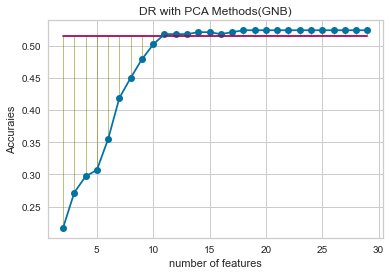

In [31]:
# GNB PCA
gnb_model = GaussianNB()
build_model_pca(X_train, X_test, y_train, y_test, gnb_model, gnb_acc, 'DR with PCA Methods(GNB)')

### 4.2 Apply LDA method to data

In [32]:
def build_model_lda(X_train, X_test, y_test, y_train, model, baseline_acc, title):
    num_features = [ ] 
    acc_list = [ ] 
    lda_lst_tr = [ ]
    lda_lst_ts = [ ]
    for i in range(2, 16): 
        lda = LDA(n_components= i) 
        lda.fit(X_train, y_train)
        lda_train = lda.transform(X_train)
        lda_test = lda.transform(X_test)
        lda_lst_tr.append(lda_train) 
        lda_lst_ts.append(lda_test)
        num_features.append(i)  
        model_lda = model.fit(lda_train, y_train) 
        y_pred = model_lda.predict(lda_test) 
        acc = round(accuracy_score(y_test, y_pred),3) 
        acc_list.append(acc) 
        
    max_acc = np.max(acc_list) 
    print(max_acc)
    max_index = acc_list.index(max_acc)
    print(max_index)
    print("Accuracies :\n", acc_list)
    print("# of Features: \n", num_features)
    print("Max Accuracy: ",max_acc)
    print("Index of Max Accuracy: ", max_index)
    print_accuracy(model_lda, y_test, y_pred, lda_test)   
    
    plot_accuracy_with_baseline(num_features, acc_list, baseline_acc, title)
    
    return acc , lda_lst_tr, lda_lst_ts

#### 4.2.1 LDA SVM

0.978
8
Accuracies :
 [0.649, 0.815, 0.872, 0.936, 0.942, 0.949, 0.974, 0.968, 0.978, 0.974, 0.974, 0.974, 0.978, 0.974]
# of Features: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Max Accuracy:  0.978
Index of Max Accuracy:  8

Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      1.00      1.00        20
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         9
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        17
           8       0.95      1.00      0.97        18
           9       0.91      0.95      0.93        21
          10       1.00      1.00      1.00        21
          11       1.00      0.96      0.98        24
          12       0.95      0.95     

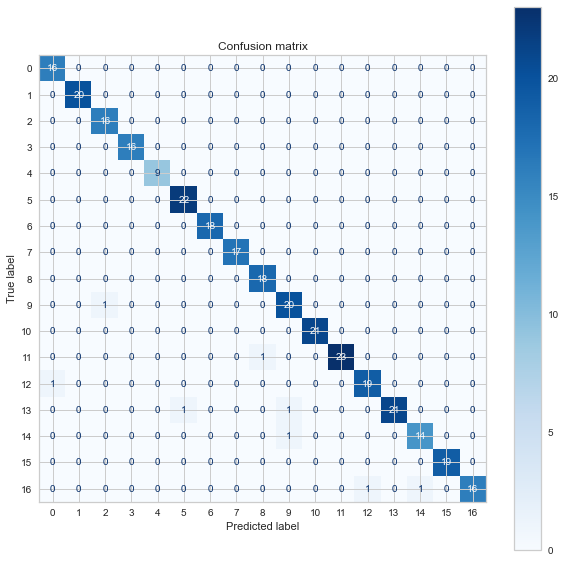

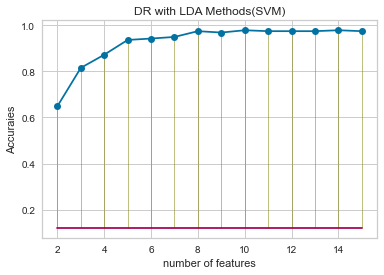

In [33]:
svm_lda_acc, lda_lst_tr, lda_lst_ts = build_model_lda(X_train, X_test, y_test, y_train, svm_model, svm_acc, 'DR with LDA Methods(SVM)')  

#### 4.2.2 LDA GNB

0.968
8
Accuracies :
 [0.62, 0.76, 0.796, 0.927, 0.927, 0.917, 0.958, 0.958, 0.968, 0.968, 0.968, 0.965, 0.965, 0.955]
# of Features: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Max Accuracy:  0.968
Index of Max Accuracy:  8

Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.87      1.00      0.93        20
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        17
           8       0.95      1.00      0.97        18
           9       0.95      0.95      0.95        21
          10       1.00      0.95      0.98        21
          11       1.00      0.96      0.98        24
          12       0.95      0.95      0

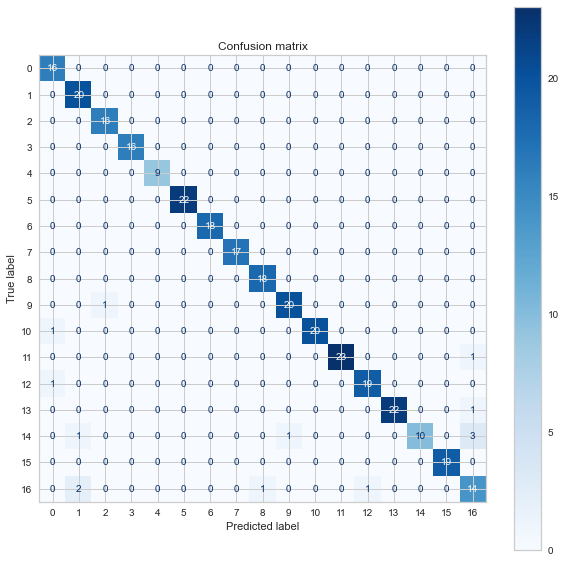

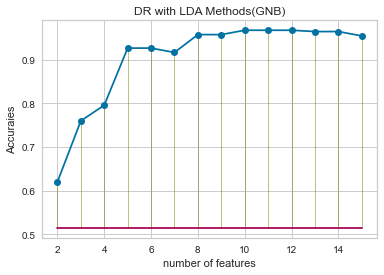

In [34]:
gnb_lda_acc, lda_lst_tr, lda_lst_ts = build_model_lda(X_train, X_test, y_test, y_train, gnb_model, gnb_acc, 'DR with LDA Methods(GNB)')

## 5. Feature Selection methods

## 5.1 Filter
### Variance threshold

In [35]:
def model_with_filter(model, lda_train, y_train, lda_test, y_test, baseline_lda_acc, title):
    constant_filter = VarianceThreshold(threshold = .9)
    n_f = [] 
    acc_filter = []
    for i in range(0, 10):
        data_constant = constant_filter.fit_transform(lda_train[i])
        model_l = model.fit(data_constant, y_train) 
        y_pred = model_l.predict(lda_test[i]) 
        acc = round(accuracy_score(y_test, y_pred),3) 
        acc_filter.append(acc)
        no_f = i+2
        n_f.append(no_f)
    acc_with_f = pd.DataFrame(zip(n_f, acc_filter), columns = ['num_of_features', 'Accuracies'])
    max_acc = np.max(acc_filter)
    print("Max Accuracy: ", max_acc)
    index = acc_filter.index(max_acc)
    acc_fs = acc_with_f.num_of_features.iloc[index].astype(int)
    print("Number of features: ",acc_fs,'\n')
    print(acc_with_f)    
    plot_accuracy_with_baseline(n_f, acc_filter, baseline_lda_acc, title)

### 5.1.1 SVM with Filter

Max Accuracy:  0.978
Number of features:  10 

   num_of_features  Accuracies
0                2       0.649
1                3       0.815
2                4       0.872
3                5       0.936
4                6       0.942
5                7       0.949
6                8       0.974
7                9       0.968
8               10       0.978
9               11       0.974


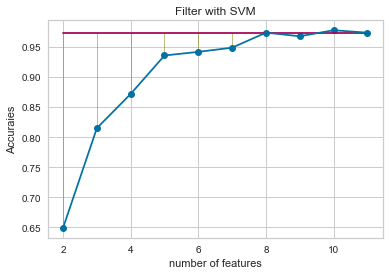

In [36]:
model_with_filter(svm_model, lda_lst_tr, y_train, lda_lst_ts, y_test, svm_lda_acc, 'Filter with SVM')

### 5.1.2 GNB with Filter

Max Accuracy:  0.968
Number of features:  10 

   num_of_features  Accuracies
0                2       0.620
1                3       0.760
2                4       0.796
3                5       0.927
4                6       0.927
5                7       0.917
6                8       0.958
7                9       0.958
8               10       0.968
9               11       0.968


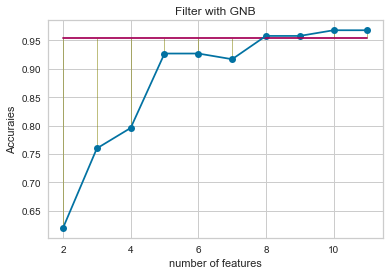

In [37]:
model_with_filter(gnb_model, lda_lst_tr, y_train, lda_lst_ts, y_test, gnb_lda_acc, 'Filter with GNB')

## 5.2 Wrapper
### Sequential Forward Selection

In [38]:
def plo_wrapper_acc(max_record, improved_baseline_acc, df_SFS_results, model_lbl, label1, label2, title):
    print(" The Improved Base accuracy of ", model_lbl, ": " ,improved_baseline_acc ,'\n')
    plt.plot(df_SFS_results.index , df_SFS_results.avg_score, label = label1)
    plt.axhline(y= improved_baseline_acc, color= 'r', linestyle= '-' , label = label2)
    plt.title(title)
    plt.xlabel("Num of Components")
    plt.ylabel('Accuracies')
    plt.ylim(0,1)
    plt.legend()
    plt.ylim(0,1.1)
    plt.xlim(1,10)

    plt.show()

In [39]:
def model_with_wrapper(model, lda_lst_tr, improved_baseline_acc, model_lbl, label1, label2, title):
    sfs_model = SFS(model,
                   k_features = 10,
                   forward = True,
                   floating = False,
                   scoring = 'r2',
                   cv = 0)
    
    components = pd.DataFrame(lda_lst_tr[8])
    
    #Create a dataframe for the SFS results 
    sfs_model.fit(components, y_train)
    df_SFS_results = pd.DataFrame(sfs_model.subsets_).transpose()
    
    df_sfs = df_SFS_results[df_SFS_results.avg_score == max(df_SFS_results.avg_score)]
    l = df_sfs.feature_idx.to_list()
    l = list(l[0])
    
    max_record = df_sfs[['feature_names','cv_scores', 'avg_score']]
    
    print ('Max accuracy is : ', round(max_record.avg_score.values[0], 3),
   "\nand it had achieved using : ",max_record.index.values[0] ,
   " components\n")
    
    print(max_record, '\n')
    
    plo_wrapper_acc(max_record, improved_baseline_acc, df_SFS_results, model_lbl, label1, label2, title)
    
    return df_SFS_results, max_record

### 5.2.1 SVM with wrapper

Max accuracy is :  0.98 
and it had achieved using :  8  components

              feature_names             cv_scores avg_score
8  (0, 2, 4, 5, 6, 7, 8, 9)  [0.9800847622517892]  0.980085 

 The Improved Base accuracy of  SVM LDA :  0.974 



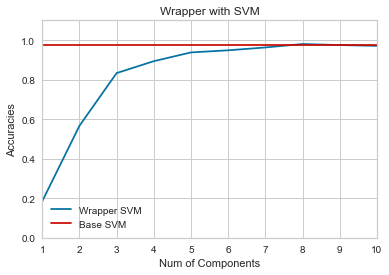

In [40]:
df_SFS_results_svm, max_record_svm = model_with_wrapper(svm_model,
                                                        lda_lst_tr,
                                                        svm_lda_acc,
                                                        'SVM LDA',
                                                        "Wrapper SVM",
                                                        "Base SVM",
                                                        "Wrapper with SVM")

In [41]:
display(df_SFS_results_svm, max_record_svm)

,feature_idx,cv_scores,avg_score,feature_names
1,"(7,)",[0.18426789860189174],0.184268,"(7,)"
2,"(0, 7)",[0.5659931355734021],0.565993,"(0, 7)"
3,"(0, 2, 7)",[0.8330158506551344],0.833016,"(0, 2, 7)"
4,"(0, 2, 7, 8)",[0.8932569678238518],0.893257,"(0, 2, 7, 8)"
5,"(0, 2, 4, 7, 8)",[0.9376121324935817],0.937612,"(0, 2, 4, 7, 8)"
6,"(0, 2, 4, 6, 7, 8)",[0.948279830325542],0.94828,"(0, 2, 4, 6, 7, 8)"
7,"(0, 2, 4, 6, 7, 8, 9)",[0.9626795710522749],0.96268,"(0, 2, 4, 6, 7, 8, 9)"
8,"(0, 2, 4, 5, 6, 7, 8, 9)",[0.9800847622517892],0.980085,"(0, 2, 4, 5, 6, 7, 8, 9)"
9,"(0, 1, 2, 4, 5, 6, 7, 8, 9)",[0.9747343998716729],0.974734,"(0, 1, 2, 4, 5, 6, 7, 8, 9)"
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.9708041954072664],0.970804,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)"


,feature_names,cv_scores,avg_score
8,"(0, 2, 4, 5, 6, 7, 8, 9)",[0.9800847622517892],0.980085


### 5.2.2 GNB with wrapper

Max accuracy is :  0.956 
and it had achieved using :  8  components

              feature_names             cv_scores avg_score
8  (0, 2, 3, 4, 5, 6, 7, 8)  [0.9563384008239889]  0.956338 

 The Improved Base accuracy of  GNB LDA :  0.955 



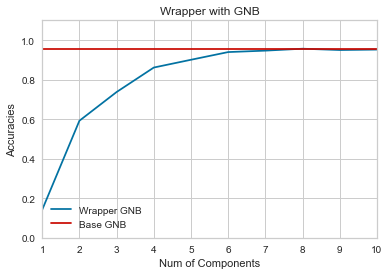

In [42]:
df_SFS_results_gnb, max_record_gnb = model_with_wrapper(gnb_model,
                                                        lda_lst_tr,
                                                        gnb_lda_acc,
                                                        'GNB LDA',
                                                        "Wrapper GNB",
                                                        "Base GNB",
                                                        "Wrapper with GNB")

In [43]:
display(df_SFS_results_gnb, max_record_gnb)

,feature_idx,cv_scores,avg_score,feature_names
1,"(7,)",[0.14166316113059485],0.141663,"(7,)"
2,"(0, 7)",[0.5919192742671757],0.591919,"(0, 7)"
3,"(0, 2, 7)",[0.7372377586653974],0.737238,"(0, 2, 7)"
4,"(0, 2, 7, 8)",[0.861088739686609],0.861089,"(0, 2, 7, 8)"
5,"(0, 2, 3, 7, 8)",[0.9004568381872182],0.900457,"(0, 2, 3, 7, 8)"
6,"(0, 2, 3, 4, 7, 8)",[0.9393625596920148],0.939363,"(0, 2, 3, 4, 7, 8)"
7,"(0, 2, 3, 4, 6, 7, 8)",[0.9465954569836535],0.946595,"(0, 2, 3, 4, 6, 7, 8)"
8,"(0, 2, 3, 4, 5, 6, 7, 8)",[0.9563384008239889],0.956338,"(0, 2, 3, 4, 5, 6, 7, 8)"
9,"(0, 2, 3, 4, 5, 6, 7, 8, 9)",[0.9496669613129796],0.949667,"(0, 2, 3, 4, 5, 6, 7, 8, 9)"
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.9519788462920422],0.951979,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)"


,feature_names,cv_scores,avg_score
8,"(0, 2, 3, 4, 5, 6, 7, 8)",[0.9563384008239889],0.956338


## 6. Choose the best number of cluster for k-means based Q4 Dimensionality Reduction

  - based on DR, the best accuracy come from SVM based on LDA
     - Max Accuracy:  0.978
     - Index of Max Accuracy:  8
     - Index of # of features that lead to max accuracy is 10

### 6.1 Apply LDA with n_components = 8

In [44]:
lda = LDA(n_components= 8)
lda.fit(X_train, y_train)
lda_train = lda.transform(X_train) 
lda_test = lda.transform(X_test) 

### 6.1.1 Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of clusters

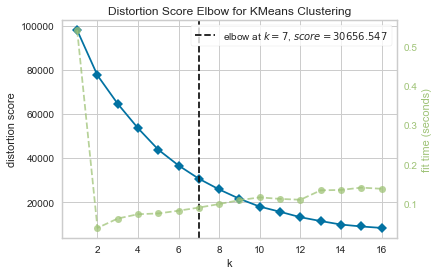

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state= 2021)
visualizer = KElbowVisualizer(model, k=(1,17), timings= True)

visualizer.fit(lda_train)  # Fit the data to the visualizer
visualizer.show()          # Finalize and render the figure

### 6.1.2 Determine the optimal number of clusters for k-means

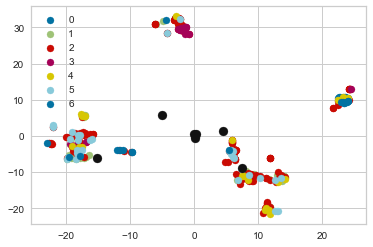

In [46]:
km = KMeans(random_state= 2021, n_clusters = 7).fit(lda_train)

# get labels
label = km.predict(lda_test)
u_labels = np.unique(label)

cluster_labels = km.labels_
clabel = np.unique(cluster_labels)

#Getting the Centroids
centroids = km.cluster_centers_

#plotting the results:
for i in u_labels:
    plt.scatter(X_test_tsne[label == i , 0] , X_test_tsne[label == i , 1] , label = i)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

# 7 SOM

#### 7.1 Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of neurons 

In [47]:
_, dim = lda_train.shape

In [48]:
from sklearn_som.som import SOM
d_som = SOM(m = 3, n = 2, dim = dim)
som_pred = d_som.fit_predict(lda_train)

In [49]:
rs = 0
score_list = [ ]
inertia_list = [ ]
for i in range(2, 31):
    d_som = SOM(m = i, n = 1, dim = dim)
    som_pred = d_som.fit_predict(lda_train)
    score = silhouette_score(lda_train, som_pred, random_state=rs)
    iner = d_som.inertia_
    score_list.append(score)
    inertia_list.append(iner)

In [50]:
score_list
min(inertia_list)   # 22

9545.910415790733

#### 7.2 Determine the optimal number of neurons for SOM

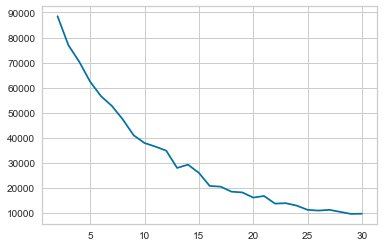

In [51]:
from matplotlib import pyplot as plt
plt.plot(list(range(2, 31)), inertia_list)
plt.show()

In [52]:
rs = 0
score = silhouette_score(lda_train, som_pred, random_state=rs)
print(f'Silhouette Score = {score}')

Silhouette Score = 0.5225965340781271


#### 7.3 Initial and Final positions

In [53]:
from minisom import MiniSom
# Set the hyper parameters
som_grid_rows = 4
som_grid_columns = 4
iterations = 10
sigma = 1
learning_rate = 0.5

# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=8, sigma=sigma, learning_rate=learning_rate)
# Initializing the weights
som.random_weights_init(lda_train)
s0 = som.distance_map().T
# Training
som.train_random(lda_train, iterations)
s1 = som.distance_map().T

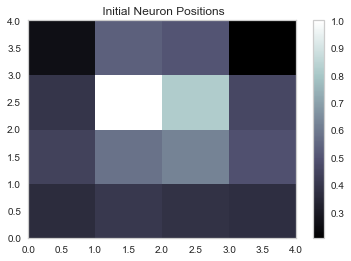

In [67]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(s0)  
colorbar()
plt.title(" Initial Neuron Positions")
show()

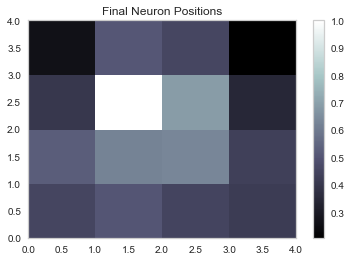

In [70]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(s1)  
colorbar()
plt.title("Final Neuron Positions")
show()

# DBSCAN

In [56]:
y = pd.DataFrame(X_train)
y.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,45.000000,50.000000,6.000000e+05,0.700000,45.000000,88.100000,347.000000,40.000000,50.000000,75.000000
1,0.990403,1.0,0.990403,1.000000,0.990403,2.038386,0.509597,0.495202,1.0,1.980807,...,45.287898,130.287898,1.058711e+06,1.694242,84.520170,50.000000,525.040340,60.287898,81.343524,25.287898
2,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,1.0,2.000000,...,45.000000,50.000000,1.059860e+06,0.400000,50.000000,88.100000,258.000000,50.000000,50.000000,40.000000
3,0.500000,1.0,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.0,0.500000,...,42.252130,61.282340,1.000000e+06,1.028234,66.831914,85.773470,196.636341,100.495741,107.252130,68.297445
4,0.334368,0.5,0.000000,1.662527,1.000000,0.334368,1.000000,1.000000,1.0,0.668737,...,28.312634,87.575591,8.000000e+05,1.432505,88.374731,66.670456,322.211607,111.563172,106.563172,73.250537


In [57]:
from sklearn.cluster import DBSCAN
from tqdm import tqdm

## Tuning the parameters epsilon (0.2-3) and minpoints (2-15)

In [59]:
def unsupervisedLabelMap(labels, y):
    labelDict = dict()
    for label in unique_labels(labels):
        tmpY = y[labels == label]
        unique, count = np.unique(tmpY, return_counts=True)
        trueLabel = unique[np.argmax(count)]
        labelDict[label] = trueLabel
    return labelDict
def usLabels2sLabels(labels, y):
    sLabels = np.empty(labels.shape, labels.dtype)
    labelDict = unsupervisedLabelMap(labels, y)
    for usl, tl in labelDict.items():
        sLabels[labels == usl] = tl
    return sLabels

In [60]:
from sklearn.utils.multiclass import unique_labels
rs = 0
X, y = lda_train, np.array(y_train)
_, dim = X.shape
classes = unique_labels(y)
eps_list, ms_list, acc_list, num_clusters, num_noise = [ ], [ ], [ ], [ ], [ ]
for eps in tqdm(np.arange(.2, 3, .1)):
    for m_s in range(2, 15):
        db_model = DBSCAN(eps = eps, min_samples = m_s)
        predLables = db_model.fit_predict(X)
        score = silhouette_score(X, predLables, random_state=rs)
        predY = usLabels2sLabels(predLables, y)
        accuracy = accuracy_score(y, predY)
        labels = db_model.labels_
        cluster = len(set(labels)) - (1 if -1 in labels else 0)
        noise = list(labels).count(-1)
        eps_list.append(eps)
        ms_list.append(m_s)
        acc_list.append(accuracy)
        num_clusters.append(cluster)
        num_noise.append(noise)

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:18<00:00,  1.49it/s]


## Projecting the whole set of parameters combinations

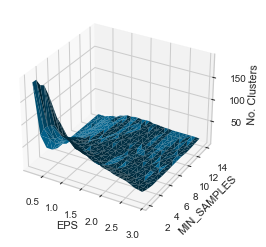

Epsilon: 1.5000000000000004
Min Samples: 2
Accuracy: 0.9536370903277378
Clusters: 68
Noise: 63


In [61]:
eps_list, ms_list, acc_list, num_clusters = np.array(eps_list), np.array(ms_list), np.array(acc_list), np.array(num_clusters)
ax = plt.axes(projection='3d')
ax.plot_trisurf(eps_list, ms_list, num_clusters)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('No. Clusters')
plt.show()
i = acc_list.argmax()
print(f"Epsilon: {eps_list[i]}\nMin Samples: {ms_list[i]}\nAccuracy: {acc_list[i]}\nClusters: {num_clusters[i]}\nNoise: {num_noise[i]}")         

## The combinations for 7 clusters or around

In [64]:
combinations = pd.DataFrame(list(zip(eps_list, ms_list, acc_list, num_clusters)),
                      columns =['Epsilon', 'MinSamples', 'Accuracy', 'Cluster'])

combinations_df_5_11 = combinations[combinations.Cluster.isin(range(5,11))]
com_10 = combinations_df_5_11#.head(10)
com_10

,Epsilon,MinSamples,Accuracy,Cluster
0,0.2,5,0.117506,9
1,0.3,7,0.110312,5
2,0.4,9,0.171063,10
3,0.4,10,0.127898,5
4,0.5,11,0.193445,7
5,0.5,12,0.183853,7
6,0.6,13,0.240608,7
7,0.6,14,0.207834,7
8,0.7,13,0.298161,9
9,0.7,14,0.274181,7


## plot for from 5 to 10 clusters parameters combinations

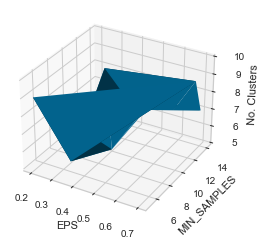

Epsilon: 0.7
Min Samples: 13
Accuracy: 0.298
Clusters: 9
Noise: 1232


In [66]:
eps_list, ms_list, acc_list, num_clusters = np.array(com_10.Epsilon), np.array(com_10.MinSamples), np.array(com_10.Accuracy), np.array(com_10.Cluster)
ax = plt.axes(projection='3d')
ax.plot_trisurf(eps_list, ms_list, num_clusters)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('No. Clusters')
plt.show()
i = acc_list.argmax()
print(f"""Epsilon: {round(eps_list[i],3)}\nMin Samples: {ms_list[i]}
Accuracy: {round(acc_list[i],3)}\nClusters: {num_clusters[i]}\nNoise: {num_noise[i]}""")         